First, establish an ssh tunnel [with your PNI password] to jtb3-dev.princeton.edu to make the database available to you:

    ssh username@jtb3-dev.princeton.edu -L 3306:127.0.0.1:3306 -N

jtb3-dev is the database server on which all behavior and mouse data is stored. Second, make sure you have installed datajoint >= '0.12.dev3'
[ pip install datajoint==0.12.dev3 ]

In [1]:
import pylab as pl
import datajoint as dj
import numpy as np
dj.__version__

'0.12.dev3'

# Work with tables directly

In [2]:
#Overview across database schemas
dj.list_schemas()

AttributeError: module 'datajoint' has no attribute 'list_schemas'

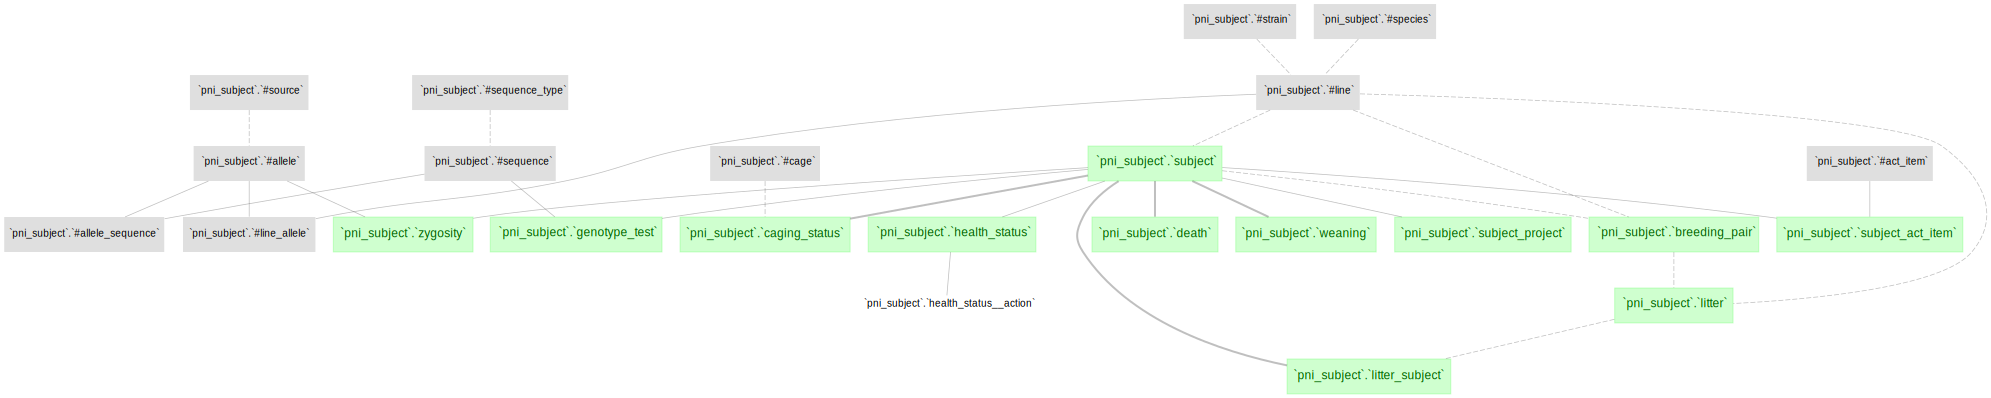

In [3]:
#Single entity relationship diagram. This is how the data is organized
acqu = dj.schema('pni_acquisition')
subj = dj.schema('pni_subject')
lab = dj.schema('pni_lab')
act = dj.schema('pni_action')


dj.ERD(subj)

# Reconstruct classes from the database directly

In [4]:
acquisition = dj.create_virtual_module('acquisition', 'pni_acquisition')
subject = dj.create_virtual_module('subject', 'pni_subject')
action = dj.create_virtual_module('action', 'pni_action')

Now let's have some serious fun with the database, with some queries

In [5]:
# Very fat mice
subject.Subject() & 'initial_weight > 35'

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
edward,E79,None,Male,2017-05-03,=BLOB=,vivarium,1910,C57BL6/J,,36.6
edward,E80,None,Male,None,=BLOB=,valhalla,1910,C57BL6/J,,41.9
lucas,vg12,None,Male,None,=BLOB=,vivarium,1910,Unknown,,35.5
lucas,vg30,None,Male,2017-08-26,=BLOB=,vivarium,1910,VGAT-ChR2-EYFP,,35.8
lucas,vg31,None,Male,2017-08-26,=BLOB=,vivarium,1910,VGAT-ChR2-EYFP,,36.3


In [6]:
subject.Subject() & 'dob between "2019-01-01" and "2019-03-01"' & 'initial_weight > 15'

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
mioffe,M10_604,None,Female,2019-02-10,=BLOB=,vivarium,1910,Thy1-GP5.3,,24.1
testuser,T01,None,Female,2019-01-23,=BLOB=,vivarium,1910,Thy1-GP5.3,,26.0
testuser,T02,None,Male,2019-01-25,=BLOB=,vivarium,1910,C57BL6/J,,20.0
testuser,T05,None,Male,2019-02-01,=BLOB=,vivarium,1910,C57BL6/J,,18.0
testuser,T06,None,Male,2019-01-23,=BLOB=,vivarium,1910,DAT-Ai148,,25.0
testuser,T07,None,Male,2019-01-05,=BLOB=,vivarium,1910,VGAT-ChR2-EYFP,,19.0
testuser,T08,None,Male,2019-02-14,=BLOB=,vivarium,1910,D2-CRE,,19.0
testuser,T12,None,Male,2019-02-10,=BLOB=,vivarium,1910,DAT-Ai148,,19.0


In [12]:
acquisition.TowersBlock() & 'user_id = "edward"' & 'subject_id = "E22"' & 'block_level = "11"' & 'block_performance > "0.6"'

user_id username,subject_id nickname,session_date date of experiment,session_number number,block block number,task,block_level difficulty level,set_id parameter set id,n_trials number of trials in this block,first_trial trial_idx of the first trial in this block,"block_duration in secs, duration of the block",block_start_time absolute start time of the block,"reward_mil in mL, reward volume in this block",reward_scale scale of the reward in this block,easy_block true if the difficulty reduces during the session,block_performance performance in the current block
edward,E22,2017-02-15,0,4,Towers,11,1,1,61,1328.97,2017-02-15 15:37:00,0.4464,2,0,0.688889
edward,E22,2017-02-15,0,6,Towers,11,1,1,162,1686.02,2017-02-15 16:01:00,0.5256,2,0,0.682243
edward,E22,2017-02-16,0,2,Towers,11,1,1,59,2703.55,2017-02-16 16:12:00,0.8208,2,0,0.626374
edward,E22,2017-02-17,0,4,Towers,11,1,1,93,1659.53,2017-02-17 16:57:00,0.5472,2,0,0.66087
edward,E22,2017-02-21,0,4,Towers,11,1,1,32,3060.54,2017-02-21 16:16:00,0.9216,2,0,0.62439
edward,E22,2017-02-22,0,4,Towers,11,1,1,110,383.458,2017-02-22 15:48:00,0.1224,2,0,0.653846
edward,E22,2017-02-22,0,7,Towers,11,1,1,151,1436.66,2017-02-22 15:58:00,0.5184,2,0,0.705882
edward,E22,2017-02-23,0,2,Towers,11,1,1,57,1089.91,2017-02-23 16:47:00,0.3024,2,0,0.608696
edward,E22,2017-02-23,0,4,Towers,11,1,1,136,1469.4,2017-02-23 17:07:00,0.4968,2,0,0.71134
edward,E22,2017-02-24,0,2,Towers,11,1,1,14,1455.36,2017-02-24 16:28:00,0.3888,2,0,0.613636


In [13]:
acquisition.TowersBlock() & 'user_id = "edward"' & 'subject_id = "E22"' & 'block_level = "11"' & 'block_performance > "0.6"' & 'session_date = "2017-02-22"'

user_id username,subject_id nickname,session_date date of experiment,session_number number,block block number,task,block_level difficulty level,set_id parameter set id,n_trials number of trials in this block,first_trial trial_idx of the first trial in this block,"block_duration in secs, duration of the block",block_start_time absolute start time of the block,"reward_mil in mL, reward volume in this block",reward_scale scale of the reward in this block,easy_block true if the difficulty reduces during the session,block_performance performance in the current block
edward,E22,2017-02-22,0,4,Towers,11,1,1,110,383.458,2017-02-22 15:48:00,0.1224,2,0,0.653846
edward,E22,2017-02-22,0,7,Towers,11,1,1,151,1436.66,2017-02-22 15:58:00,0.5184,2,0,0.705882


In [7]:
# On which days of week does people like to work harder?
Session = acquisition.Session();
for day in range(7):
    print( len( Session & 'WEEKDAY(session_date) = ' + str(day) ))

489
1360
1415
1460
1396
955
173


# Do fatter mice do better?

In [25]:
acquisition.Session & 'user_id = "Edward"' & 'subject_id = "E43"' & 'level = "11"' & 'session_performance > "60"'

user_id username,subject_id nickname,session_date date of experiment,session_number number,session_start_time start time,session_end_time end time,location,task,level difficulty level,set_id parameter set id,stimulus_bank path to the function to generate the stimulus,stimulus_commit git hash for the version of the function,stimulus_set an integer that describes a particular set of stimuli in a trial,ball_squal quality measure of ball data,session_performance percentage correct on this session,session_narrative
edward,E43,2017-08-04,0,2017-08-04 12:32:00,2017-08-04 13:15:00,Bezos3,Towers,11,1,,,1,85.2,67.5,
edward,E43,2017-08-11,0,2017-08-11 13:46:00,2017-08-11 14:38:00,Bezos3,Towers,11,1,,,1,87.0,61.1,
edward,E43,2017-08-15,0,0000-00-00 00:00:00,2017-08-15 13:53:00,Bezos3,Towers,11,1,,,1,80.1,62.8,
edward,E43,2017-08-16,0,2017-08-16 12:15:00,2017-08-16 12:55:00,Bezos3,Towers,11,1,,,1,87.2,61.7,
edward,E43,2017-08-17,0,2017-08-17 12:14:00,2017-08-17 12:45:00,Bezos3,Towers,11,1,,,1,79.3,65.6,
edward,E43,2017-08-18,0,2017-08-18 12:24:00,0000-00-00 00:00:00,Bezos3,Towers,11,1,,,1,80.3,68.1,
edward,E43,2017-08-21,0,2017-08-21 14:30:00,0000-00-00 00:00:00,Bezos3,Towers,11,1,,,1,85.1,60.9,
edward,E43,2017-08-25,0,2017-08-25 16:33:00,2017-08-25 17:21:00,Bezos3,Towers,11,1,,,1,85.3,61.0,
edward,E43,2017-08-29,0,2017-08-29 17:16:00,2017-08-29 17:56:00,Bezos3,Towers,11,1,,,1,80.7,65.3,
edward,E43,2017-08-31,0,2017-08-31 16:43:00,2017-08-31 17:24:00,Bezos3,Towers,11,1,,,1,82.1,69.2,


In [8]:
# grab a mouse first
subj = subject.Subject & 'subject_id="E47"'

In [9]:
# some magic to get weight on the date of each session
weight_with_date = action.Weighing.proj('weight', session_date="DATE(weighing_time)")
weight_with_date

user_id username,subject_id nickname,weighing_time,weight in grams,session_date calculated attribute
ben,B205,2018-06-20 12:52:00,26.0,2018-06-20
ben,B205,2018-06-21 16:53:00,25.5,2018-06-21
ben,B205,2018-06-23 04:39:00,25.0,2018-06-23
ben,B205,2018-06-24 21:22:00,26.0,2018-06-24
ben,B205,2018-06-25 15:15:00,25.7,2018-06-25
ben,B205,2018-06-27 11:55:00,26.0,2018-06-27
ben,B205,2018-06-28 12:44:00,25.5,2018-06-28
ben,B205,2018-06-29 21:44:00,25.7,2018-06-29
ben,B205,2018-06-30 12:43:00,26.4,2018-06-30
ben,B205,2018-07-01 11:20:00,26.5,2018-07-01


In [10]:
# promote the session_date to primary key with dj.U()
weight_with_date = dj.U('user_id', 'subject_id', 'session_date') * weight_with_date

In [11]:
# join weight_with_date and session to get both information
query = weight_with_date * acquisition.Session

Body Weight vs. performance in all enimals

1364

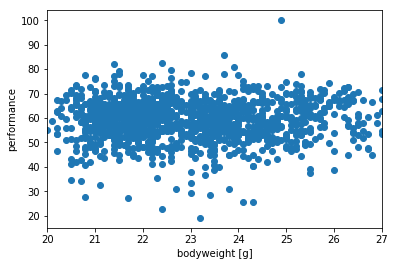

In [223]:
weight, performance = (query & 'level = "11"').fetch('weight','session_performance')
pl.scatter(weight, performance)
pl.xlabel('bodyweight [g]')
pl.ylabel('performance')
pl.xlim([20, 27])
pl.xlabel('bodyweight [g]')
pl.ylabel('performance')
len(weight)

In [29]:
fl = (weight<27) & (weight>20)
np.corrcoef(weight[fl],performance[fl])

array([[1.        , 0.00376698],
       [0.00376698, 1.        ]])

In [31]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'performance')

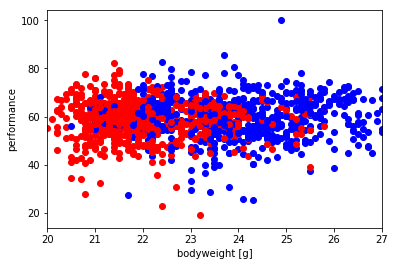

In [53]:
subjects = subject.Subject.proj('sex') & (query & 'level = "11"')
corrs = []
maledata = []
femaledata = []
for s in subjects:
    # fetch all related info: weight, performance and sex
    sex, weight, performance = (subject.Subject.proj('sex') * (query & 'level = "11"') & s).fetch('sex', 'weight','session_performance')
    if sex[0] == 'Male':
        pl.scatter(weight, performance, c=[[0, 0, 1]])
        [maledata.append(p) for p in performance]
    else: 
        pl.scatter(weight, performance, c=[[1, 0, 0]])
        [femaledata.append(p) for p in performance]
    corrs.append(np.corrcoef(weight, performance)[0, 1])
    
pl.xlim([20, 27])
pl.xlabel('bodyweight [g]')
pl.ylabel('performance')

In [85]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

maledata = np.array(maledata)
print(bs.bootstrap(maledata, stat_func=bs_stats.mean))
femaledata = np.array(femaledata)
print(bs.bootstrap(femaledata, stat_func=bs_stats.mean))


NameError: name 'maledata' is not defined

In [60]:
from scipy import stats
stats.ttest_ind(maledata, femaledata)

Ttest_indResult(statistic=3.50795633740287, pvalue=0.00046625520095498383)

# Performance as function of time

In [158]:
import datetime

time, performance = (query & 'level = "11"').fetch('session_start_time','session_performance')

tt = np.zeros(len(time))
oktimes = np.zeros(len(time)) == 1
for i in range(len(time)):
    stringflag = type(time[i]) == str
    if (not stringflag):
        tt[i] = time[i].hour
        oktimes[i] = True


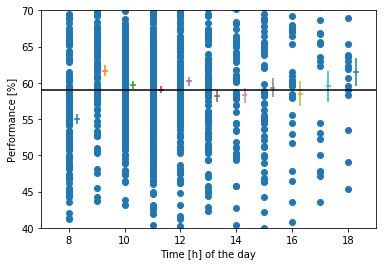

In [221]:
pl.scatter(tt[oktimes], performance[oktimes])
pl.xlabel('Time [h] of the day')
pl.ylabel('Performance [%]')

a = tt[oktimes]
b = performance[oktimes]

for hours in range(8,19):
    data = b[a == hours]
    yerr = np.std(data)/np.sqrt(len(data))
    y = np.mean(data)
    pl.errorbar(hours+0.3, y, xerr=0.1, yerr=yerr)
    
pl.ylim([40,70])
pl.xlim([7,19])
pl.plot([7,20],[np.mean(b), np.mean(b)],'k-')

# Sam vs. Scott as trainers

sstein: 60.20593080724876    (59.60030889621088, 60.82735584843491) [95% C.I.]
sbaptista: 57.06350364963503    (56.08611313868612, 58.06386861313867) [95% C.I.]


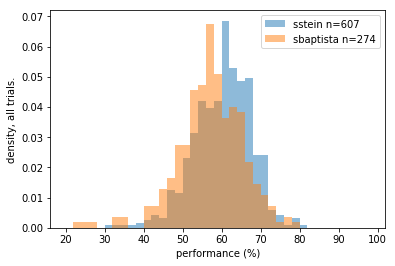

In [95]:
# some magic to get weight on the date of each session
weight_with_date = action.Weighing.proj('weigh_person', session_date="DATE(weighing_time)")
weight_with_date = dj.U('weigh_person', 'subject_id', 'session_date') * weight_with_date
query = weight_with_date * acquisition.Session
person, performance = (query & 'level = "11"').fetch('weigh_person','session_performance')

for tech in ['sstein', 'sbaptista']:
    ci = bs.bootstrap(performance[person == tech], stat_func=bs_stats.mean)
    print(tech + ': ' + str(ci) + ' [95% C.I.]')
    pl.hist(performance[person == tech],np.arange(20,100,2), density=True, alpha=0.5, label = tech + ' n=' + str(np.sum(person == tech)))
pl.xlabel('performance (%)')
pl.ylabel('density, all trials.')
pl.legend()

# Compute trial numbers for all sessions of a mouse

In [ ]:
sessions = acquisition.Session & 'subject_id = "E39"' & 'session_date > "2017-10-21"'
sessions

In [ ]:
trials_subset = acquisition.TowersBlock.Trial & sessions
acquisition.Session.aggr(trials_subset, n='count(*)')

# Visualize all trials for a session

In [ ]:
pos, time = trials_subset.fetch('position', 'trial_time')

In [ ]:
for trial_idx in range(len(pos)):
    N_samples = len(pos[trial_idx])
    pl.plot(time[trial_idx][0:N_samples], pos[trial_idx][:,1])
pl.xlabel('Time [s]');
pl.ylabel('position [cm]');

In [113]:
acquisition.TowersBlock() & 'subject_id = "E39"' & 'block_level = "11"'

user_id username,subject_id nickname,session_date date of experiment,session_number number,block block number,task,block_level difficulty level,set_id parameter set id,n_trials number of trials in this block,first_trial trial_idx of the first trial in this block,"block_duration in secs, duration of the block",block_start_time absolute start time of the block,"reward_mil in mL, reward volume in this block",reward_scale scale of the reward in this block,easy_block true if the difficulty reduces during the session
edward,E39,2017-08-22,0,9,Towers,11,1,1,152,768.64,2017-08-22 15:05:00,0.3,3,0
edward,E39,2017-08-22,0,11,Towers,11,1,1,196,572.751,2017-08-22 15:18:00,0.156,3,0
edward,E39,2017-09-07,0,2,Towers,11,1,1,18,848.623,2017-09-07 13:07:00,0.168,2,0
edward,E39,2017-09-07,0,4,Towers,11,1,1,68,862.267,2017-09-07 13:24:00,0.216,3,0
edward,E39,2017-09-07,0,6,Towers,11,1,1,118,56.761,2017-09-07 13:43:00,0.0,3,0
edward,E39,2017-10-06,0,2,Towers,11,1,1,11,315.625,2017-10-06 13:46:00,0.08,2,0
edward,E39,2017-10-06,0,4,Towers,11,1,1,33,323.508,2017-10-06 13:52:00,0.08,2,0
edward,E39,2017-10-11,0,4,Towers,11,1,1,54,655.607,2017-10-11 13:29:00,0.2208,2,0
edward,E39,2017-10-11,0,6,Towers,11,1,1,106,1294.43,2017-10-11 13:42:00,0.6528,2,0
edward,E39,2017-10-12,0,2,Towers,11,1,1,11,1151.18,2017-10-12 13:02:00,0.3976,2,0


In [103]:
query = acquisition.TowersBlock() & 'subject_id = "E39"' & 'block_level = "11"'

In [104]:
acquisition.TowersBlock.Trial & query

user_id username,subject_id nickname,session_date date of experiment,session_number number,block block number,"trial_idx trial index, keep the original number in the file","trial_type answer of this trial, left or right","choice choice of this trial, left or right","trial_time time series of this trial, start from zero for each trial",trial_abs_start absolute start time of the trial realtive to the beginning of the session,collision boolean vector indicating whether the subject hit the maze on each time point,cue_presence_left boolean vector for the presence of the towers on the left,cue_presence_right boolean vector for the presence of the towers on the right,cue_onset_left onset time of the cues on the left (only for the present ones),cue_onset_right onset time of the cues on the right (only for the present ones),cue_offset_left offset time of the cues on the left (only for the present ones),cue_offset_right offset time of the cues on the right (only for the present ones),cue_pos_left position of the cues on the left (only for the present ones),cue_pos_right position of the cues on the right (only for the present ones),trial_duration duration of the entire trial,excess_travel,i_arm_entry the index of the time series when the mouse enters the arm part,i_blank the index of the time series when the mouse enters the blank zone,i_cue_entry the index of the time series when the mouse neters the cue zone,i_mem_entry the index of the time series when the mouse enters the memory zone,i_turn_entry the index of the time series when the mouse enters turns,iterations length of the meaningful recording,"position 3d recording of the position of the mouse, length equals to interations","velocity 3d recording of the velocity of the mouse, length equals to interations",sensor_dots raw recordings of the ball,trial_id,trial_prior_p_left prior probablity of this trial for left,vi_start
edward,E39,2017-08-22,0,9,1,R,R,=BLOB=,2845.16,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,13.4049,-0.0683626,719,0,0,0,719,784,=BLOB=,=BLOB=,=BLOB=,1,0.5,233496
edward,E39,2017-08-22,0,9,2,R,L,=BLOB=,2858.56,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,28.8479,-0.0744976,1380,0,0,0,1380,1472,=BLOB=,=BLOB=,=BLOB=,17,0.240057,234531
edward,E39,2017-08-22,0,9,3,L,L,=BLOB=,2887.41,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,12.7411,-0.075803,682,0,0,0,682,736,=BLOB=,=BLOB=,=BLOB=,2,0.5,236943
edward,E39,2017-08-22,0,9,4,L,R,=BLOB=,2900.15,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,22.0233,-0.0519507,769,0,0,0,769,892,=BLOB=,=BLOB=,=BLOB=,3,0.5,237929
edward,E39,2017-08-22,0,9,5,L,L,=BLOB=,2922.17,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,14.5297,-0.0251983,724,0,0,0,724,888,=BLOB=,=BLOB=,=BLOB=,-6,0.5,239761
edward,E39,2017-08-22,0,9,6,R,R,=BLOB=,2936.7,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,13.117,-0.068136,710,0,0,0,710,769,=BLOB=,=BLOB=,=BLOB=,4,0.5,240900
edward,E39,2017-08-22,0,9,7,R,R,=BLOB=,2949.82,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,14.4715,-0.0678322,835,0,0,0,835,882,=BLOB=,=BLOB=,=BLOB=,5,0.5,241920
edward,E39,2017-08-22,0,9,8,L,L,=BLOB=,2964.29,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,15.3999,-0.05527,749,0,0,0,749,961,=BLOB=,=BLOB=,=BLOB=,25,0.5,243052
edward,E39,2017-08-22,0,9,9,R,R,=BLOB=,2979.69,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,19.8474,-0.0686254,1283,0,0,0,1283,1340,=BLOB=,=BLOB=,=BLOB=,6,0.5,244264
edward,E39,2017-08-22,0,9,10,L,R,=BLOB=,2999.54,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,21.8117,-0.0732886,815,0,0,0,815,873,=BLOB=,=BLOB=,=BLOB=,7,0.5,245854


In [109]:
sessionswoTeleven = acquisition.Session & 'level != "11"'

In [112]:
dj.U('subject_id', 'session_date')*sessionswoTeleven

user_id username,subject_id nickname,session_date date of experiment,session_number number,session_start_time start time,session_end_time end time,location,task,level difficulty level,set_id parameter set id,stimulus_bank path to the function to generate the stimulus,stimulus_commit git hash for the version of the function,stimulus_set an integer that describes a particular set of stimuli in a trial,ball_squal quality measure of ball data,session_performance percentage correct on this session,session_narrative
ben,B205,2018-06-27,0,2018-06-27 10:48:00,2018-06-27 11:54:00,VRTrain5,Towers,4,1,,,1,51.3,96.3,
ben,B205,2018-06-28,0,2018-06-28 11:40:00,2018-06-28 12:40:00,VRTrain5,Towers,5,1,,,1,48.5,94.9,
ben,B205,2018-07-03,0,2018-07-03 11:30:00,2018-07-03 12:33:00,VRTrain5,Towers,6,1,,,1,62.0,95.0,
ben,B205,2018-07-04,0,2018-07-04 11:14:00,2018-07-04 12:13:00,VRTrain5,Towers,7,1,,,1,61.7,92.6,
ben,B205,2018-07-05,0,2018-07-05 11:27:00,2018-07-05 12:20:00,VRTrain5,Towers,8,1,,,1,62.4,94.8,
ben,B205,2018-07-06,0,2018-07-06 11:18:00,2018-07-06 12:15:00,VRTrain5,Towers,9,1,,,1,57.6,69.3,
ben,B205,2018-07-07,0,2018-07-07 11:47:00,2018-07-07 12:32:00,VRTrain5,Towers,10,1,,,1,58.2,61.7,
ben,B205,2018-07-11,0,2018-07-11 11:32:00,2018-07-11 12:27:00,VRTrain5,Towers,10,1,,,1,59.2,77.0,
ben,B205,2018-07-12,0,2018-07-12 10:56:00,2018-07-12 11:50:00,VRTrain5,Towers,9,1,,,1,57.0,66.7,
ben,B205,2018-07-13,0,2018-07-13 10:57:00,2018-07-13 11:49:00,VRTrain5,Towers,9,1,,,1,55.9,64.2,
